In [ ]:
# Sin tildes. |ya
# Sin caracteres especiales. |ya
# Sin correos, números, símbolos y otros diferentes a palabras. |ya
# Sin siglas (No más de una letra mayúscula en una misma palabra). |ya
# No caracteres: [\n, \t, \u200b] |ya
#Únicamente palabras en minúsculas. |ya
# No palabras repetidas. |ya 
# Longitud mayor a 3 caracteres |ya
#Sin stop words. Palabras como: el, la, los, son, ellos, ellas, etc. |ya


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import string
import re
from collections import OrderedDict 
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
with open('/content/data/output_file.txt','r') as raw_file:
  text = raw_file.read()

#no accent
d  = {'Á':'a','É':'e','Í':'i','Ó':'o','Ú':'u','á':'a','é':'e','í':'i','ó':'o','ú':'u'}
text_no_acent = re.sub(r'([ÁÉÍÓÚáéíóú])', lambda m: str(d[m.group(1)]), text)
#no mails
text_no_mails = re.sub(r"\S+@\S+", "", text_no_acent) #absolutely i didn't find any mails
#drop [\n, \t, \u200b]
text_just_spaces = (re.sub(r'\n|\t|\u200b',' ', text_no_mails))
#no words with 2 letters
one_upper = re.sub(r"\w*[A-Z]\w*[A-Z]\w*","",text_just_spaces )
#uppercase to lowercase
new_string = re.sub(r"[A-Z]",lambda m: str(m.group(0).lower()),one_upper )
#no urls
text_no_urls = re.sub(r"http\S+"," ",new_string )
#no chars
chars = re.escape(string.punctuation)
no_especial_characters = re.sub(r'['+chars+']', ' ',text_no_urls)
#final list
regex = r'[a-zñ]+'
just_letters = re.findall(regex,no_especial_characters)
len(just_letters)
sentence = " ".join(stop_words)
di  = {'á':'a','é':'e','í':'i','ó':'o','ú':'u'}
string_stop_words_no_accent = re.sub(r'([áéíóú])', lambda m: str(di[m.group(1)]), sentence)

stop_words_no_accent = re.findall(r'[a-zñ]+',string_stop_words_no_accent)

In [ ]:
#creating pd with column words
df = pd.DataFrame(just_letters,columns =['Words'])
df_words = df.groupby(['Words'])['Words'].count().reset_index(name="count")
#creating column Number of letters
df_words['Number of letters'] = df_words['Words'].str.len()
#creating column Number of vowels
df_words['Number of vowels'] = df_words['Words'].str.count(r'[aeiou]')
#creating column Number of consonants
number_of_consonant = df_words['Number of letters']-df_words['Number of vowels']
df_words['Number of consonants'] = number_of_consonant
#droping stop_words
df_words = df_words[~df_words['Words'].isin(stop_words_no_accent)]#corregir stopwords antes de quitar tilde
#just words with more than 3 letters
df_words = df_words[~(df_words['Number of letters'] < 4 )]

df_words = df_words[df_words['Number of consonants'] != 0]
df_words = df_words[df_words['Number of vowels'] != 0]
df_words



,Words,count,Number of letters,Number of vowels,Number of consonants
1,aachen,1,6,3,3
2,aaron,3,5,3,2
4,abad,1,4,2,2
5,abadan,1,6,3,3
6,abades,1,6,3,3
...,...,...,...,...,...
33126,zuñiga,2,6,3,3
33127,zygmunt,2,7,1,6
33128,zyklon,2,6,1,5
33129,ñame,1,4,2,2


In [ ]:
df_words.sort_values(by=['count'])

,Words,count,Number of letters,Number of vowels,Number of consonants
1,aachen,1,6,3,3
18296,justificaron,1,12,5,7
18293,justificando,1,12,5,7
18292,justificados,1,12,5,7
18289,justificaciones,1,15,7,8
...,...,...,...,...,...
15092,gran,578,4,1,3
15264,guerra,627,6,3,3
3448,años,643,4,2,2
28902,siglo,659,5,2,3


In [ ]:
df_words

,Words,count,Number of letters,Number of vowels,Number of consonants
1,aachen,1,6,3,3
2,aaron,3,5,3,2
4,abad,1,4,2,2
5,abadan,1,6,3,3
6,abades,1,6,3,3
...,...,...,...,...,...
33126,zuñiga,2,6,3,3
33127,zygmunt,2,7,1,6
33128,zyklon,2,6,1,5
33129,ñame,1,4,2,2


In [ ]:
data_f = df_words['Number of letters'].values
mean = statistics.mean(data_f)
median = statistics.median(data_f)
mode = statistics.mode(data_f)
q1,q3,p90= np.percentile(data_f, [25,75,90])
iqr = q3 - q1
threshold = q3+1.5*iqr
max = np.max(data_f)
min = np.min(data_f)
var = np.var(data_f)
std = np.std(data_f)
print("mean:", mean)
print("median:", median)
print("mode:", mode)
print("q1:", q1)
print("q3:", q3)
print("p90:", p90)
print("iqr:", iqr)
print("threshold atypical values",threshold)
print("max:", max)
print("min:", min)
print("range:", max-min)
print("var:", var)
print("std:",std)
#filtered = list(filter(lambda num: num < threshold ,data_f))

mean: 8
median: 8
mode: 8
q1: 7.0
q3: 10.0
p90: 12.0
iqr: 3.0
threshold atypical values 14.5
max: 25
min: 4
range: 21
var: 6.779218184158318
std: 2.603693181647622


In [ ]:
data=df_words['Number of letters']
data

1        6
2        5
4        4
5        6
6        6
        ..
33126    6
33127    7
33128    6
33129    4
33130    4
Name: Number of letters, Length: 32397, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


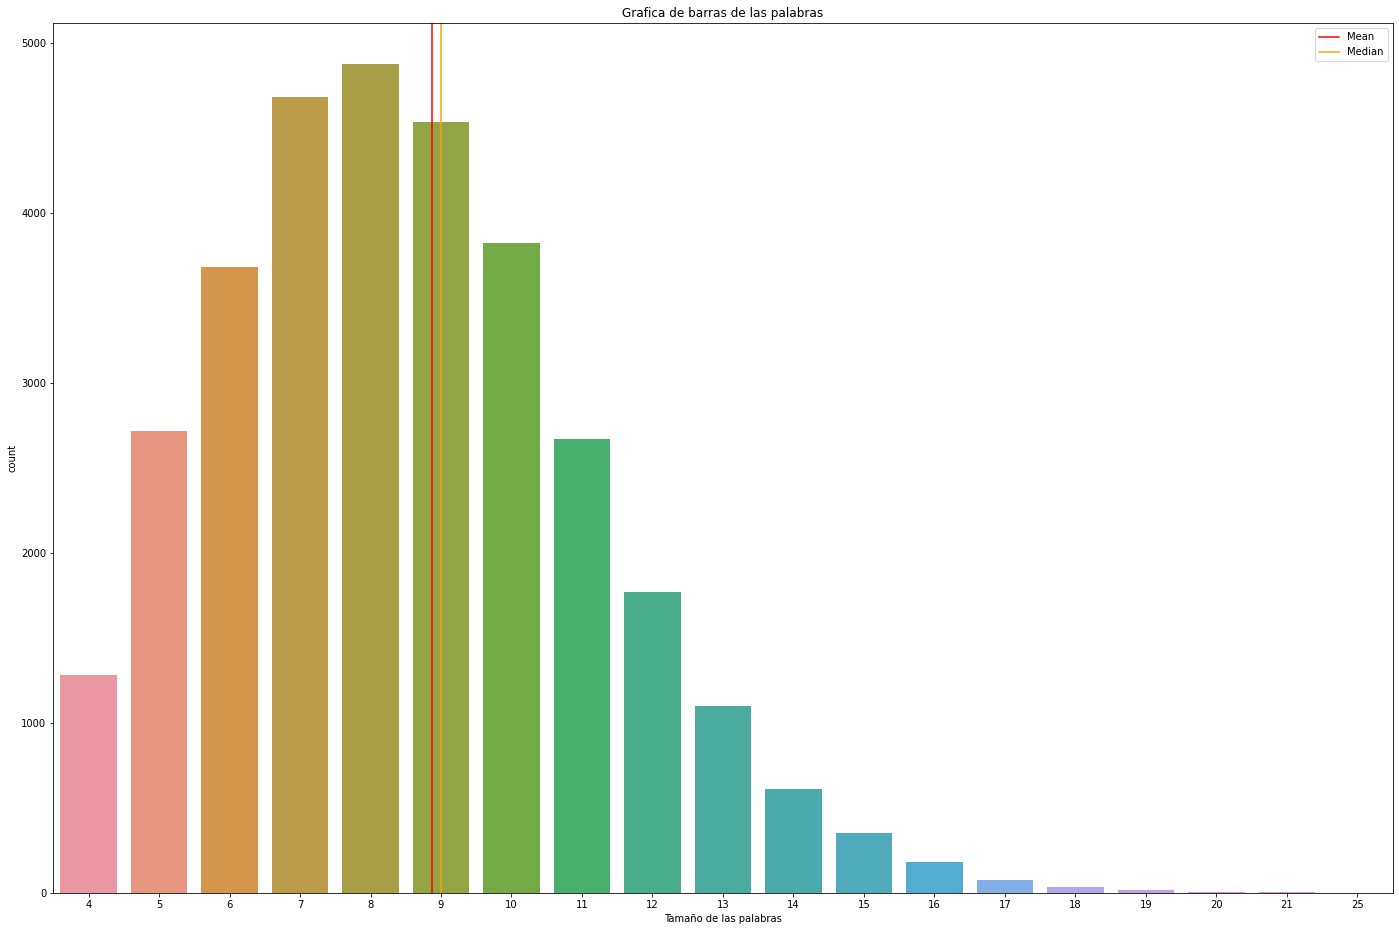

In [ ]:
#histogram
plt.figure(figsize=(24,16))
plt.axvline(x=mean, color = "red", label = "Mean")
plt.axvline(x=median, color = "orange", label = "Median")
plt.title("Grafica de barras de las palabras")
plt.xlabel("Tamaño de las palabras")
plt.ylabel("Numero de palabras")
plt.legend()
sns.countplot(data_f)
# default_x_ticks = range(0,max+1)
# plt.xticks(default_x_ticks)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


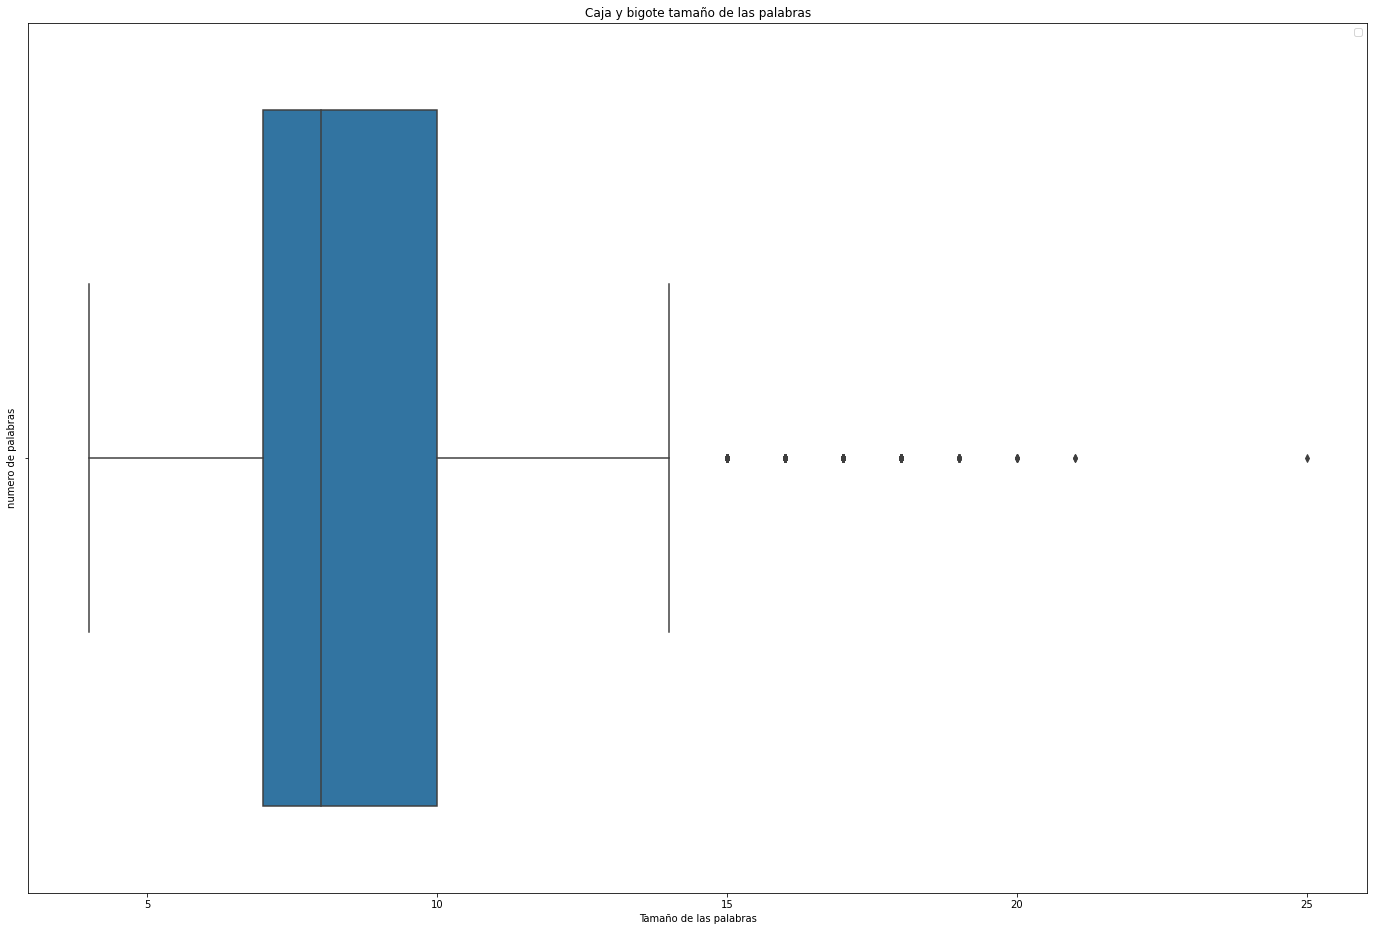

In [ ]:
#histogram
plt.figure(figsize=(24,16))
plt.title("Caja y bigote tamaño de las palabras")
sns.boxplot(df_words['Number of letters'].values)
plt.ylabel("numero de palabras")
plt.xlabel("Tamaño de las palabras")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


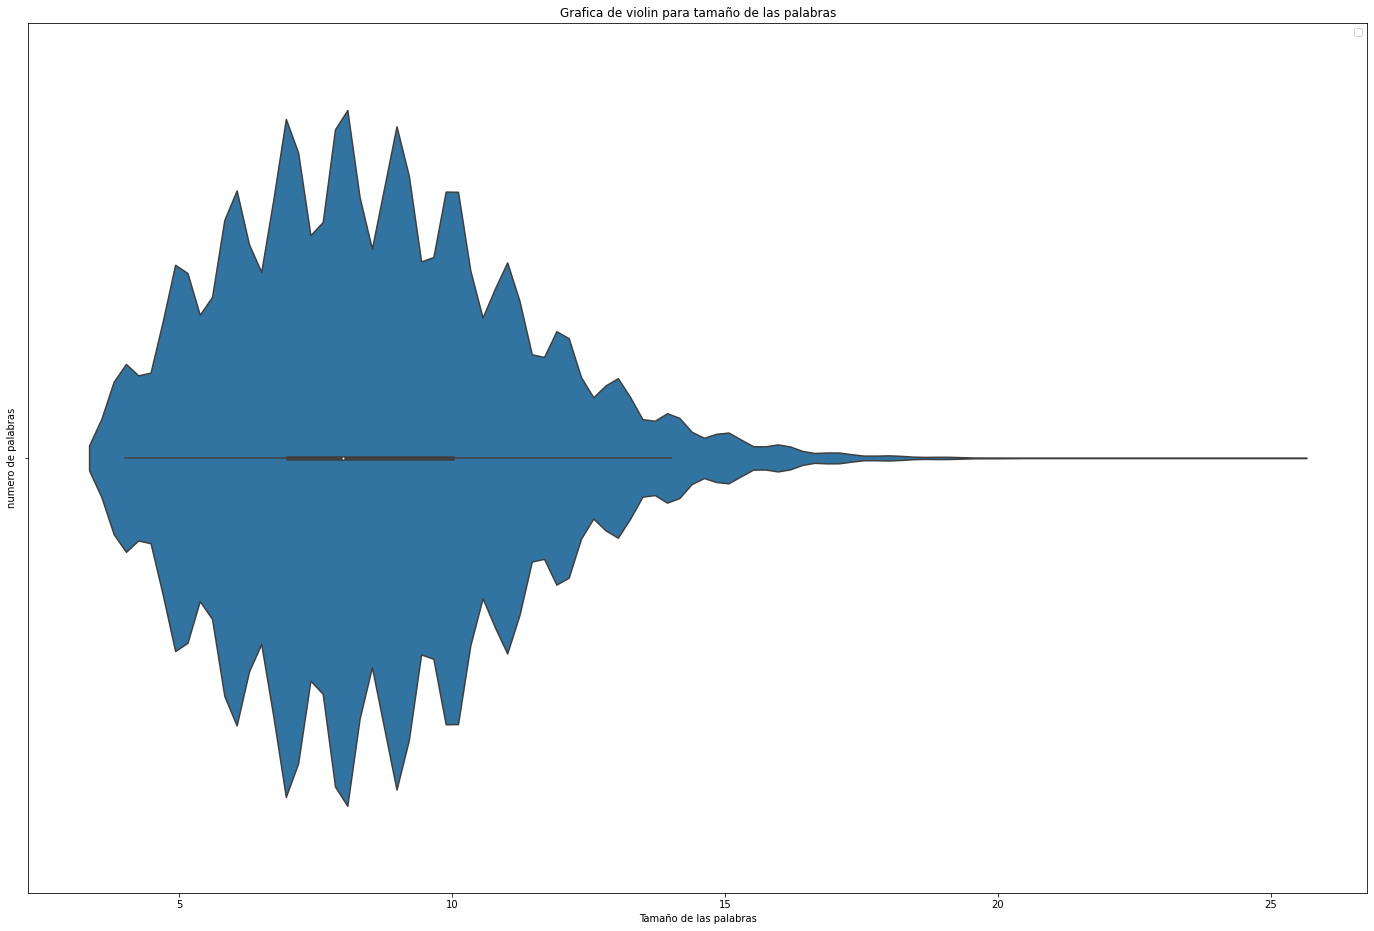

In [ ]:
plt.figure(figsize=(24,16))
plt.title("Grafica de violin para tamaño de las palabras")
sns.violinplot(data_f)
plt.ylabel("numero de palabras")
plt.xlabel("Tamaño de las palabras")
plt.legend()
plt.show()

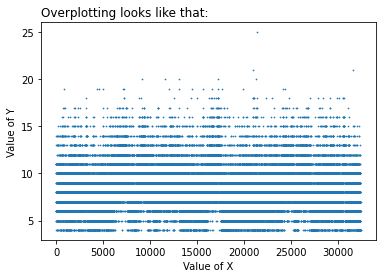

In [ ]:
plt.plot(df_words['Number of letters'].values, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting looks like that:', loc='left')
plt.show()

In [ ]:
import numpy as np
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)
alphabet_list.append('ñ')
#max_df = np.max(list(df_words['Number of letters'].values))
columns = ['Letters',"Mean","Median","Mode","First quartile","Third quartile","90% percentile",
           "Interquartile range","Max","Min","Range","Variance","Standard deviation","threshold"]
number_columns = [*range(1, 26)]
columns.extend(number_columns)
df_letters = pd.DataFrame(columns = columns)
df_letters

,Letters,Mean,Median,Mode,First quartile,Third quartile,90% percentile,Interquartile range,Max,Min,...,16,17,18,19,20,21,22,23,24,25


In [ ]:
dict_letters_position = {}
#words = ['jorge', 'castilla']
for letter in alphabet_list:
  position_list = []
  for word in df_words['Words']:
  #for word in words:
    if letter in word:
      l = [pos+1 for pos, char in enumerate(word) if char == letter]
     
      position_list.extend(l)
  dict_letters_position[letter]=position_list
  
  mean = statistics.mean(position_list)
  median = statistics.median(position_list)
  mode = statistics.mode(position_list)
  q1,q3,p90= np.percentile(position_list, [25,75,90])
  iqr = q3 - q1
  threshold = q3+(1.5*iqr)
  max = np.max(position_list)
  min = np.min(position_list)
  range = max-min
  var = np.var(position_list)
  std = np.std(position_list)
  dicts = {'Letters':letter,"Mean":mean,"Median":median,"Mode":mode,"First quartile":q1,
           "Third quartile":q3,"90% percentile":p90,"Interquartile range":iqr,"Max":max,
           "Min":min,"Range":range,"Variance":var,"Standard deviation":std,"threshold":threshold}
  for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]:
    count = position_list.count(i)
    dicts[i] = count
  
  df_letters = df_letters.append(dicts, ignore_index=True)
df_letters.iloc[:,:15]
#len(dict_letters_position['a'])
#df_letters.iloc[:,:14]

In [ ]:
df_letters.iloc[:,14:]

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,3396,4541,2055,3584,3947,4045,4393,3400,2547,1722,...,38,12,5,2,2,0,0,1,0,0
1,1092,349,1003,467,450,383,329,245,157,94,...,0,1,0,0,0,0,0,0,0,0
2,3852,537,2061,1587,1449,1496,1124,1059,678,408,...,0,2,0,0,0,0,0,0,0,0
3,2223,379,1020,1031,994,1354,1259,1258,902,620,...,3,5,3,1,1,1,0,0,0,0
4,2525,5982,2150,3842,3367,2264,1941,1506,1149,907,...,71,18,11,9,0,0,0,0,0,0
5,1123,172,539,389,259,255,134,115,34,18,...,1,1,0,0,0,0,0,0,0,0
6,878,217,895,713,553,500,270,199,88,50,...,1,0,0,0,0,0,0,0,0,0
7,881,327,197,336,270,144,112,76,40,20,...,0,0,0,0,0,0,0,0,0,0
8,1690,3082,1731,3680,3621,3417,3098,2012,1679,956,...,9,7,3,0,0,1,0,0,0,0
9,331,76,197,137,129,112,45,30,18,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
da

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


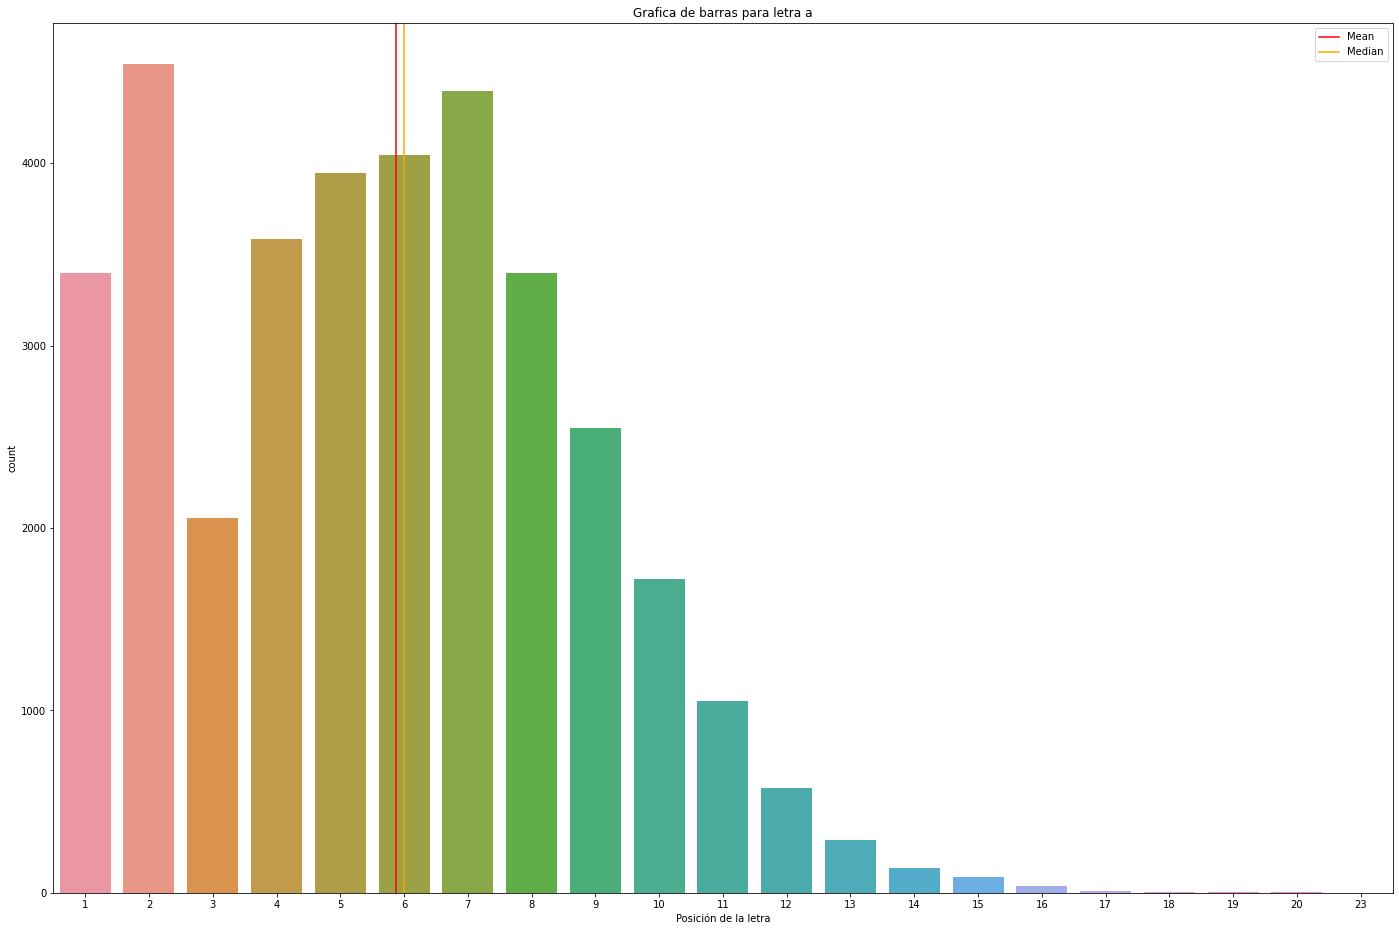

In [ ]:
#bar
letter = "a"
title = "Grafica de barras para letra {}".format(letter)
position_list = dict_letters_position[letter]
plt.figure(figsize=(24,16))
plt.axvline(x=mean, color = "red", label = "Mean")
plt.axvline(x=median, color = "orange", label = "Median")
plt.title(title)
plt.xlabel("Posición de la letra")
plt.ylabel("Frecuencia")
plt.legend()
sns.countplot(position_list)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


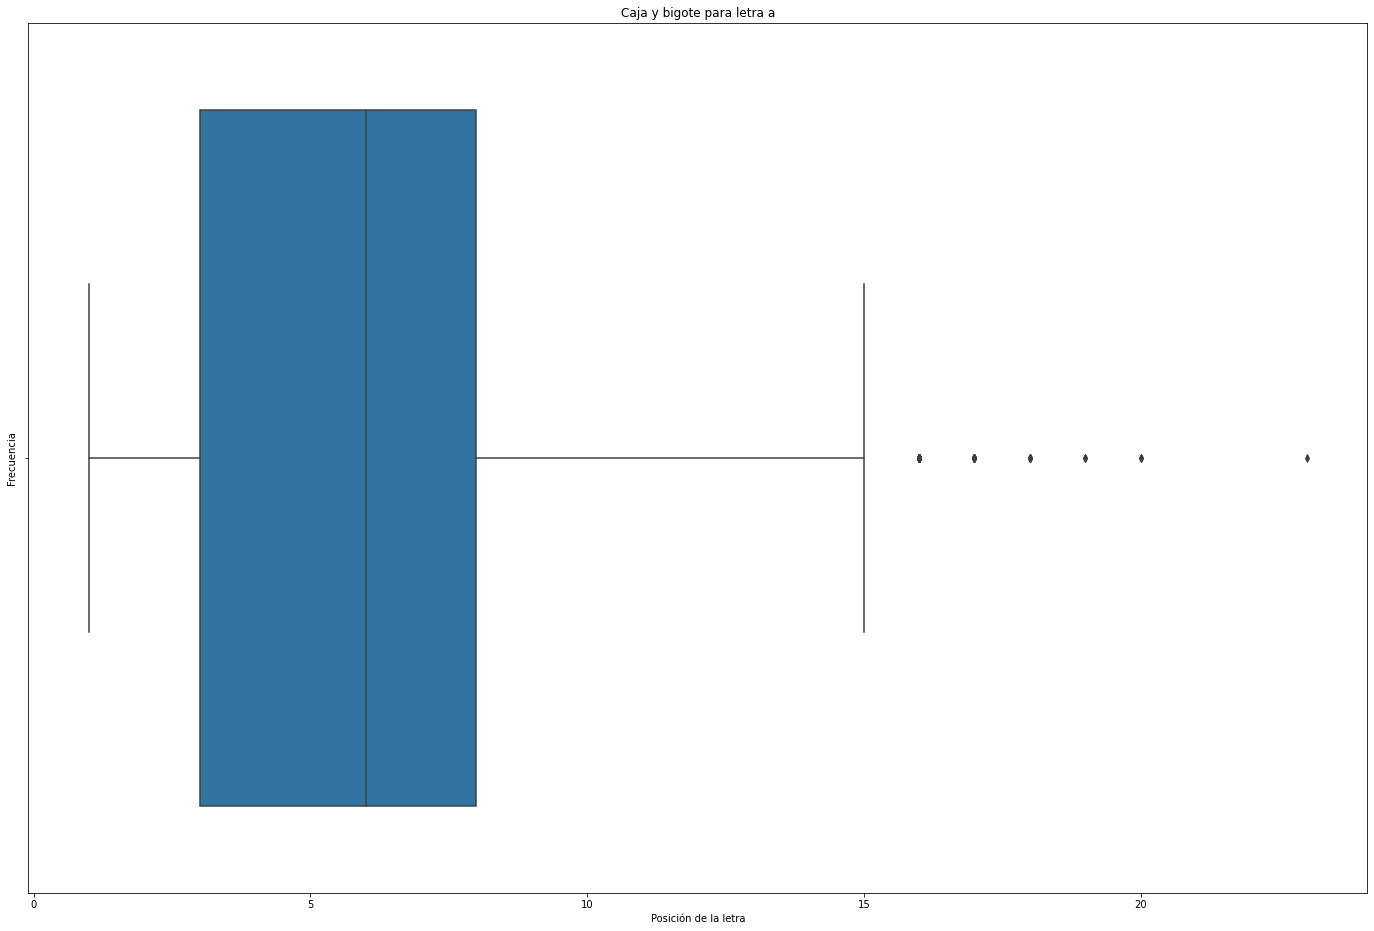

In [ ]:
#box
letter = "a"
title = "Caja y bigote para letra {}".format(letter)
position_list = dict_letters_position[letter]
plt.figure(figsize=(24,16))
plt.title(title)
plt.xlabel("Posición de la letra")
plt.ylabel("Frecuencia")
sns.boxplot(position_list)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


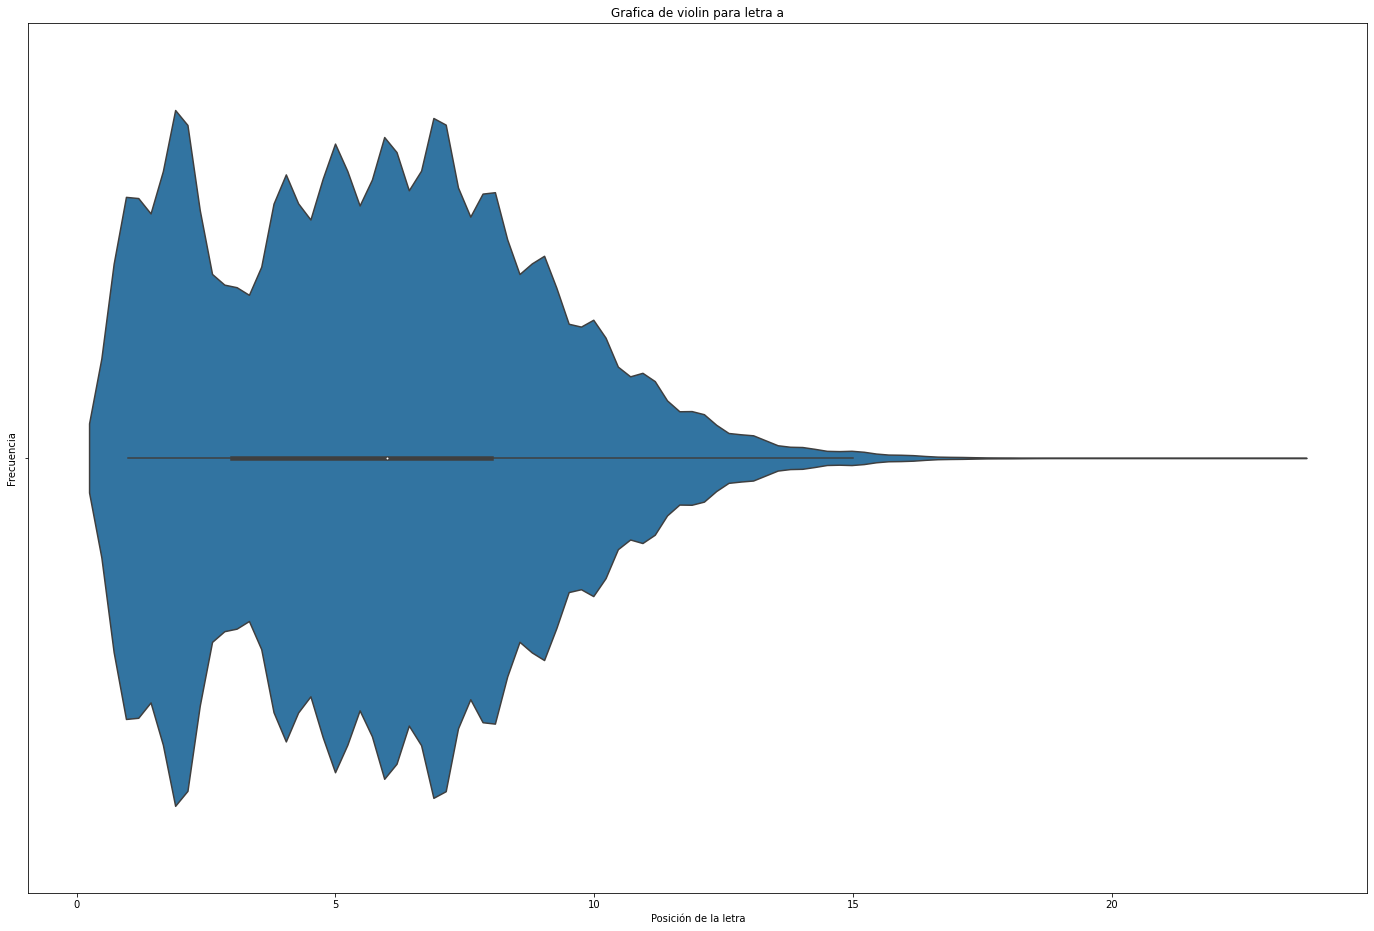

In [ ]:
letter = "a"
title = "Grafica de violin para letra {}".format(letter)
position_list = dict_letters_position[letter]
plt.figure(figsize=(24,16))
plt.title(title)
plt.xlabel("Posición de la letra")
plt.ylabel("Frecuencia")
sns.violinplot(position_list)
plt.show()

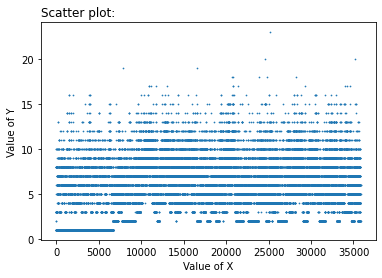

In [ ]:
letter = "a"
title = "Grafica de violin para letra {}".format(letter)
position_list = dict_letters_position[letter]
plt.plot(position_list, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Scatter plot:', loc='left')
plt.show()
